In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
from sklearn.linear_model import LinearRegression as lr
from sklearn.cross_validation import train_test_split as tts

In [42]:
investor = pd.DataFrame.from_csv('investor.csv')
investor = investor.fillna(investor.mean())
msft = pd.DataFrame.from_csv('MSFT.csv')
msft = msft.fillna(msft.mean())
week=investor.index 
msftclean=msft.loc[week, :]
msftclean=msftclean.fillna(msft.mean())

In [43]:
X = investor[['Neutral','Bearish']]
regressionmodel =lr()

In [44]:
X_train, X_test, Y_train, Y_test = tts(X, msftclean.Open, test_size=0.33, random_state=5)
regressionmodel.fit(X_train, Y_train)
train= regressionmodel.predict(X_train)
test = regressionmodel.predict(X_test)

In [45]:
print 'Training data', np.mean((Y_train-train)**2)
print 'Test data', np.mean((Y_test-test)**2)

Training data 881.674383764
Test data 988.377239978


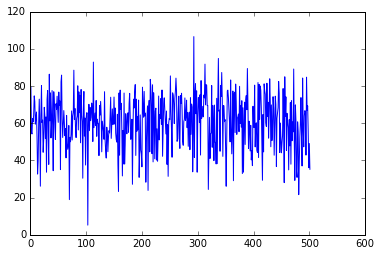

In [13]:
plt.plot(test)

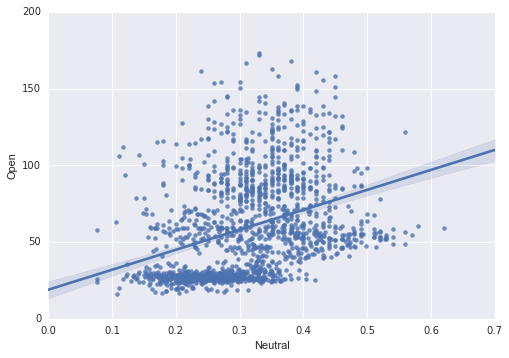

In [39]:
import seaborn as sns

df = pd.concat([msftclean, investor], axis=1)
sns.regplot(y='Open', x='Neutral', data=df, fit_reg=True)

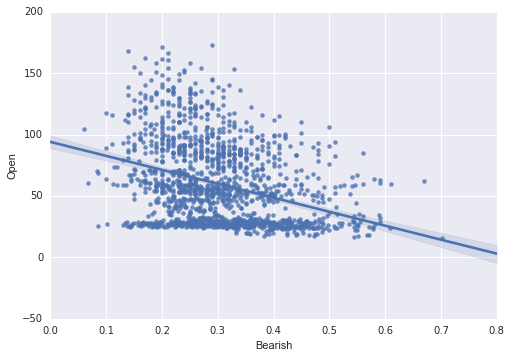

In [40]:
sns.regplot(y='Open', x='Bearish', data=df, fit_reg=True)

In [46]:
xx = investor[['Neutral']]

X_train, X_test, Y_train, Y_test = tts(xx, msftclean.Open, test_size=0.33, random_state=5)
regressionmodel.fit(X_train, Y_train)
train= regressionmodel.predict(X_train)
test = regressionmodel.predict(X_test)

print 'Training data', np.mean((Y_train-train)**2)
print 'Test data', np.mean((Y_test-test)**2)

Training data 938.464533889
Test data 1034.35707239


In [47]:
xx = investor[['Bearish']]

X_train, X_test, Y_train, Y_test = tts(xx, msftclean.Open, test_size=0.33, random_state=5)
regressionmodel.fit(X_train, Y_train)
train= regressionmodel.predict(X_train)
test = regressionmodel.predict(X_test)

print 'Training data', np.mean((Y_train-train)**2)
print 'Test data', np.mean((Y_test-test)**2)

Training data 948.868685134
Test data 1032.34357922


In [ ]:
###it is better to perform regression with two independent data, however, it is not a very good model as 
###as indicated by the low rmse value

In [50]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols(formula='Open ~ Bearish + Neutral', data=df)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                   Open   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     151.0
Date:                Sun, 30 Oct 2016   Prob (F-statistic):           1.62e-60
Time:                        21:13:08   Log-Likelihood:                -7340.3
No. Observations:                1520   AIC:                         1.469e+04
Df Residuals:                    1517   BIC:                         1.470e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     54.2670      4.741     11.446      0.0

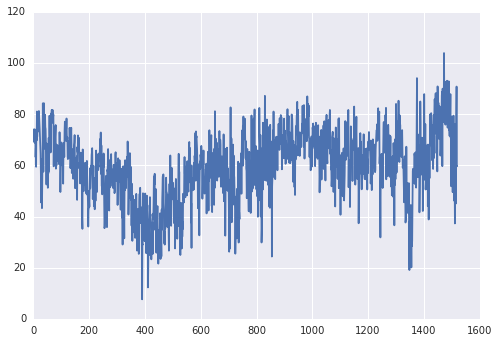

In [55]:
plt.plot(res.predict())
